In [42]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
local_path = r'/Users/pablouribepizarro/Desktop/Analisis de Datos/Tarea_1/'
datos = pd.read_csv(local_path + 'CitasEspecialidades.csv')
datos #visualisation of Data Frame

,PAID,FechaNac,Sexo,Comuna,Provincia,Region,Agenda,TipoProfesional,Especialidad,TipoAtencion,CodPrestacion,Prestacion,FechaReserva,FechaCita,EstadoCita,MotivoC,MotivoNA,MotivoS
0,1.211693e+10,2001-06-26,Mujer,Puente Alto,Cordillera,XIII Región Metropolitana,Policlínico de Escoliosis,Médico Cirujano,Traumatología Infantil,Consulta Nueva,101111.0,Consulta Integral De Especialidades En Cirugia...,2014-12-30,2015-01-05,No Atendido,NaN,No se Presentó,NaN
1,1.274585e+10,2005-06-18,Hombre,Puente Alto,Cordillera,XIII Región Metropolitana,Policlínico de Escoliosis,Médico Cirujano,Traumatología Infantil,Consulta Repetida,101111.0,Consulta Integral De Especialidades En Cirugia...,2014-04-03,2015-01-05,Atendido,NaN,NaN,NaN
2,1.248321e+10,2003-10-15,Hombre,Antofagasta,Antofagasta,II Región de Antofagasta,Policlínico de Escoliosis,Médico Cirujano,Traumatología Infantil,Consulta Repetida,101111.0,Consulta Integral De Especialidades En Cirugia...,2014-05-05,2015-01-05,No Atendido,NaN,No se Presentó,NaN
3,1.153553e+10,1998-02-18,Mujer,San Bernardo,Maipo,XIII Región Metropolitana,Policlínico de Escoliosis,Médico Cirujano,Traumatología Infantil,Consulta Repetida,101111.0,Consulta Integral De Especialidades En Cirugia...,2014-07-07,2015-01-05,Atendido,NaN,NaN,NaN
4,1.135475e+10,1996-06-08,Hombre,Vilcún,Cautín,IX Región de la Araucanía,Policlínico de Escoliosis,Médico Cirujano,Traumatología Infantil,Consulta Repetida,101111.0,Consulta Integral De Especialidades En Cirugia...,2014-07-07,2015-01-05,Atendido,NaN,NaN,NaN
5,1.157893e+10,1998-12-08,Mujer,Coinco,Cachapoal,VI Región del Libertador General Bernardo O´Hi...,Policlínico de Escoliosis,Médico Cirujano,Traumatología Infantil,Consulta Repetida,101111.0,Consulta Integral De Especialidades En Cirugia...,2014-07-07,2015-01-05,Atendido,NaN,NaN,NaN
6,1.172271e+10,1999-09-02,Mujer,Molina,Curicó,VII Región del Maule,Policlínico de Escoliosis,Médico Cirujano,Traumatología Infantil,Consulta Repetida,101111.0,Consulta Integral De Especialidades En Cirugia...,2014-07-07,2015-01-05,Atendido,NaN,NaN,NaN
7,1.223425e+10,2002-11-03,Mujer,Coihueco,Ñuble,VIII Región del Bío Bío,Policlínico de Escoliosis,Médico Cirujano,Traumatología Infantil,Consulta Repetida,101111.0,Consulta Integral De Especialidades En Cirugia...,2014-07-07,2015-01-05,Atendido,NaN,NaN,NaN
8,1.147429e+10,1997-04-18,Hombre,Peñalolén,Santiago,XIII Región Metropolitana,Policlínico de Escoliosis,Médico Cirujano,Traumatología Infantil,Consulta Repetida,101111.0,Consulta Integral De Especialidades En Cirugia...,2014-07-10,2015-01-05,No Atendido,NaN,No se Presentó,NaN
9,1.200020e+10,2000-11-08,Mujer,Freire,Cautín,IX Región de la Araucanía,Policlínico de Escoliosis,Médico Cirujano,Traumatología Infantil,Consulta Repetida,101111.0,Consulta Integral De Especialidades En Cirugia...,2014-07-21,2015-01-05,Atendido,NaN,NaN,NaN


In [3]:
def Anteriores(data):
    return(data.shape[0])   

In [4]:
def Distancia(region):
    if region == 'XIII Región Metropolitana ':
        return(0) 
    elif region == 'V Región de Valparaíso ' or region == 'VI Región del Libertador General Bernardo O´Higgins':
        return(1)
    elif region == 'IV Región de Coquimbo' or region == 'VII Región del Maule':
        return(2)
    elif region == 'III Región de Atacama':
        return(3)
    elif region == 'VIII Región del Bío Bío' or region == 'II Región de Antofagasta':
        return(4)
    elif region == 'IX Región de la Araucanía' or region == 'I Región de Tarapacá':
        return(5)
    elif region == 'XIV Región de los Ríos' or region == 'XV Región de Arica y Parinacota ':
        return(6)
    elif region == 'X Región de los Lagos':
        return(7)
    elif region == 'XI Región Aysén del General Carlos Ibáñez del Campo':
        return(8)
    elif region == 'XII Región de Magallanes y la Antártica Chilena':
        return(9)
    else: 
        return(10)

In [5]:
#Transform Data into Numerical:

datos['FechaNac'] = pd.to_datetime(datos['FechaNac'])
datos['FechaReserva'] = pd.to_datetime(datos['FechaReserva'])
datos['FechaCita'] = pd.to_datetime(datos['FechaCita'])
datos = datos.sort_values('FechaCita')

In [88]:
#Function for filling NaN values in Region Column
region_dic = datos[datos['Region'].notnull()].set_index('Comuna')['Region'].to_dict()
def ActualizarRegion(comuna):
    if comuna not in region_dic:
        return(np.nan)
    else:
        return(region_dic[comuna])

In [91]:
#Function for filling NaN values in Provincia Column
provincia_dic = datos[datos['Provincia'].notnull()].set_index('Comuna')['Provincia'].to_dict()
def ActualizarProvincia(comuna):
    if comuna not in provincia_dic:
        return(np.nan)
    else:
        return(provincia_dic[comuna])

In [128]:
#Feature Creation
datos['Edad'] = (datos['FechaCita']-datos['FechaNac']).dt.days/365
datos['DiasReservaCita'] = (datos['FechaCita']-datos['FechaReserva']).dt.days
datos['Dia Cita'] = datos['FechaCita'].dt.dayofweek

In [89]:
#Fill known Region rows
datos['Region'] = datos.apply(lambda row: ActualizarRegion(row['Comuna']),axis=1)

In [92]:
#Fill known Provincia rows
datos['Provincia'] = datos.apply(lambda row: ActualizarProvincia(row['Comuna']),axis=1)

In [7]:
datos['Distancia'] = datos.apply(lambda row: Distancia(row['Region']),axis = 1)

In [8]:
datos['Reservas Anteriores'] = datos.apply(lambda row: 
                                           Anteriores(datos.loc[(datos['PAID'] == row['PAID']) 
                                            & (datos['FechaCita'] < row['FechaCita'])]), axis =1 )

In [9]:
datos_cancelaciones = datos.loc[datos['EstadoCita'] == 'Cancelado'].copy()
datos_atenciones = datos.loc[datos['EstadoCita'] == 'Atendido'].copy()
datos_noatenciones = datos.loc[datos['EstadoCita'] == 'No Atendido'].copy()

In [10]:
datos['Cancelaciones Anteriores'] = datos.apply(lambda row: 
                                           Anteriores(datos_cancelaciones.loc[(datos_cancelaciones['PAID'] == row['PAID']) 
                                            & (datos_cancelaciones['FechaCita'] < row['FechaCita'])]), axis =1 )


In [11]:
datos['Atenciones Anteriores'] = datos.apply(lambda row: 
                                           Anteriores(datos_atenciones.loc[(datos_atenciones['PAID'] == row['PAID']) 
                                            & (datos_atenciones['FechaCita'] < row['FechaCita'])]), axis =1 )

In [12]:
datos['No Atenciones Anteriores'] = datos.apply(lambda row: 
                                           Anteriores(datos_noatenciones.loc[(datos_noatenciones['PAID'] == row['PAID']) 
                                            & (datos_noatenciones['FechaCita'] < row['FechaCita'])]), axis =1 )

In [95]:
#Save Preprepared Data
datos.to_csv(local_path+'data_new_features.csv')

In [111]:
#NaN Porcentage
def nanPorcentage(DataFrame):
    NaNDataFrame = pd.DataFrame()
    for column in DataFrame.columns:
        count_nan = len(DataFrame[column]) - DataFrame[column].count()
        NaNDataFrame.loc[column,'NaN'] = count_nan/len(DataFrame[column])
    return(NaNDataFrame)
nanPorcentage(datos)

,NaN
PAID,0.000000
FechaNac,0.000000
Sexo,0.000000
Comuna,0.017366
Provincia,0.000456
Region,0.000456
Agenda,0.000000
TipoProfesional,0.000000
Especialidad,0.000000
TipoAtencion,0.001553


In [146]:
datos.shape[0]

129447

In [112]:
#Drop Nan Values
datos_final = datos.drop(['MotivoC', 'MotivoNA','MotivoS'], axis=1).dropna()
nanPorcentage(datos_final)

,NaN
PAID,0.0
FechaNac,0.0
Sexo,0.0
Comuna,0.0
Provincia,0.0
Region,0.0
Agenda,0.0
TipoProfesional,0.0
Especialidad,0.0
TipoAtencion,0.0


In [147]:
datos_final.shape[0]

122935

In [148]:
#Drop Irrelevant values
datos_final.drop(datos_final[datos_final.Edad < 0].index, inplace=True) #Negative Age
datos_final.drop(datos_final[datos_final.DiasReservaCita < 0].index, inplace=True) #Negative Days till Reservation

In [145]:
datos_final.shape[0]

122935

In [166]:
#Save Data
datos_final.to_csv(local_path+'data_new_features_clean.csv')

In [159]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()


column_list = [] #str columns
for column in datos_final.columns:
    if datos_final[column].dtype == 'O':
        column_list.append(column)

datos_num = datos_final[column_list].astype(str).apply(le.fit_transform)
for column in datos_final.columns:
    if datos_final[column].dtype != 'O':
        datos_num[column] = datos_final[column]

In [160]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0,criterion='entropy')
clf.fit(datos_num[['Sexo', 'Comuna', 'Provincia', 'Region', 'Agenda', 'TipoProfesional',
       'Especialidad', 'TipoAtencion', 'Prestacion']], datos_num['EstadoCita'])

clf.score(datos_num[['Sexo', 'Comuna', 'Provincia', 'Region', 'Agenda', 'TipoProfesional',
       'Especialidad', 'TipoAtencion', 'Prestacion']], datos_num['EstadoCita'])

0.6332126733639728

In [161]:
clf.feature_importances_

array([ 0.08766325,  0.29662074,  0.10825407,  0.0557999 ,  0.20327244,
        0.12093645,  0.03506712,  0.07697606,  0.01540998])

In [162]:
clf.fit(datos_num[['Sexo', 'Comuna', 'Provincia', 'Region', 'Agenda',
                   'TipoProfesional','Especialidad', 'TipoAtencion', 'Prestacion','Edad',
                   'DiasReservaCita','Reservas Anteriores','Cancelaciones Anteriores','Atenciones Anteriores','No Atenciones Anteriores',
                   'Distancia', 'Dia Cita']], datos_num['EstadoCita'])

clf.score(datos_num[['Sexo', 'Comuna', 'Provincia', 'Region', 'Agenda', 
                     'TipoProfesional','Especialidad', 'TipoAtencion', 'Prestacion','Edad',
                     'DiasReservaCita','Reservas Anteriores','Cancelaciones Anteriores','Atenciones Anteriores','No Atenciones Anteriores',
                    'Distancia','Dia Cita']], datos_num['EstadoCita'])


0.96788546793020702

In [158]:
clf.feature_importances_

array([ 0.04577254,  0.14203637,  0.02393701,  0.01210299,  0.03164733,
        0.0132953 ,  0.0043329 ,  0.01747977,  0.00451633,  0.18334427,
        0.22412451,  0.0699142 ,  0.04730286,  0.05641774,  0.03053426,
        0.02557018,  0.06767143])

In [163]:
datos.groupby(['EstadoCita']).count()

,PAID,FechaNac,Sexo,Comuna,Provincia,Region,Agenda,TipoProfesional,Especialidad,TipoAtencion,...,MotivoNA,MotivoS,Edad,DiasReservaCita,Dia Cita,Distancia,Reservas Anteriores,Cancelaciones Anteriores,Atenciones Anteriores,No Atenciones Anteriores
EstadoCita,,,,,,,,,,,,,,,,,,,,,
Agendado,196,196,196,192,196,196,196,196,196,196,...,0,44,196,196,196,196,196,196,196,196
Atendido,82196,82196,82196,80832,82158,82158,82196,82196,82196,82193,...,0,11570,82196,82196,82196,82196,82196,82196,82196,82196
Cancelado,24297,24297,24297,23835,24285,24285,24297,24297,24297,24102,...,0,1890,24297,24297,24297,24297,24297,24297,24297,24297
En Espera,7,7,7,7,7,7,7,7,7,7,...,0,0,7,7,7,7,7,7,7,7
No Atendido,22732,22732,22732,22314,22723,22723,22732,22732,22732,22729,...,22732,1709,22732,22732,22732,22732,22732,22732,22732,22732
Tranferido,19,19,19,19,19,19,19,19,19,19,...,0,0,19,19,19,19,19,19,19,19


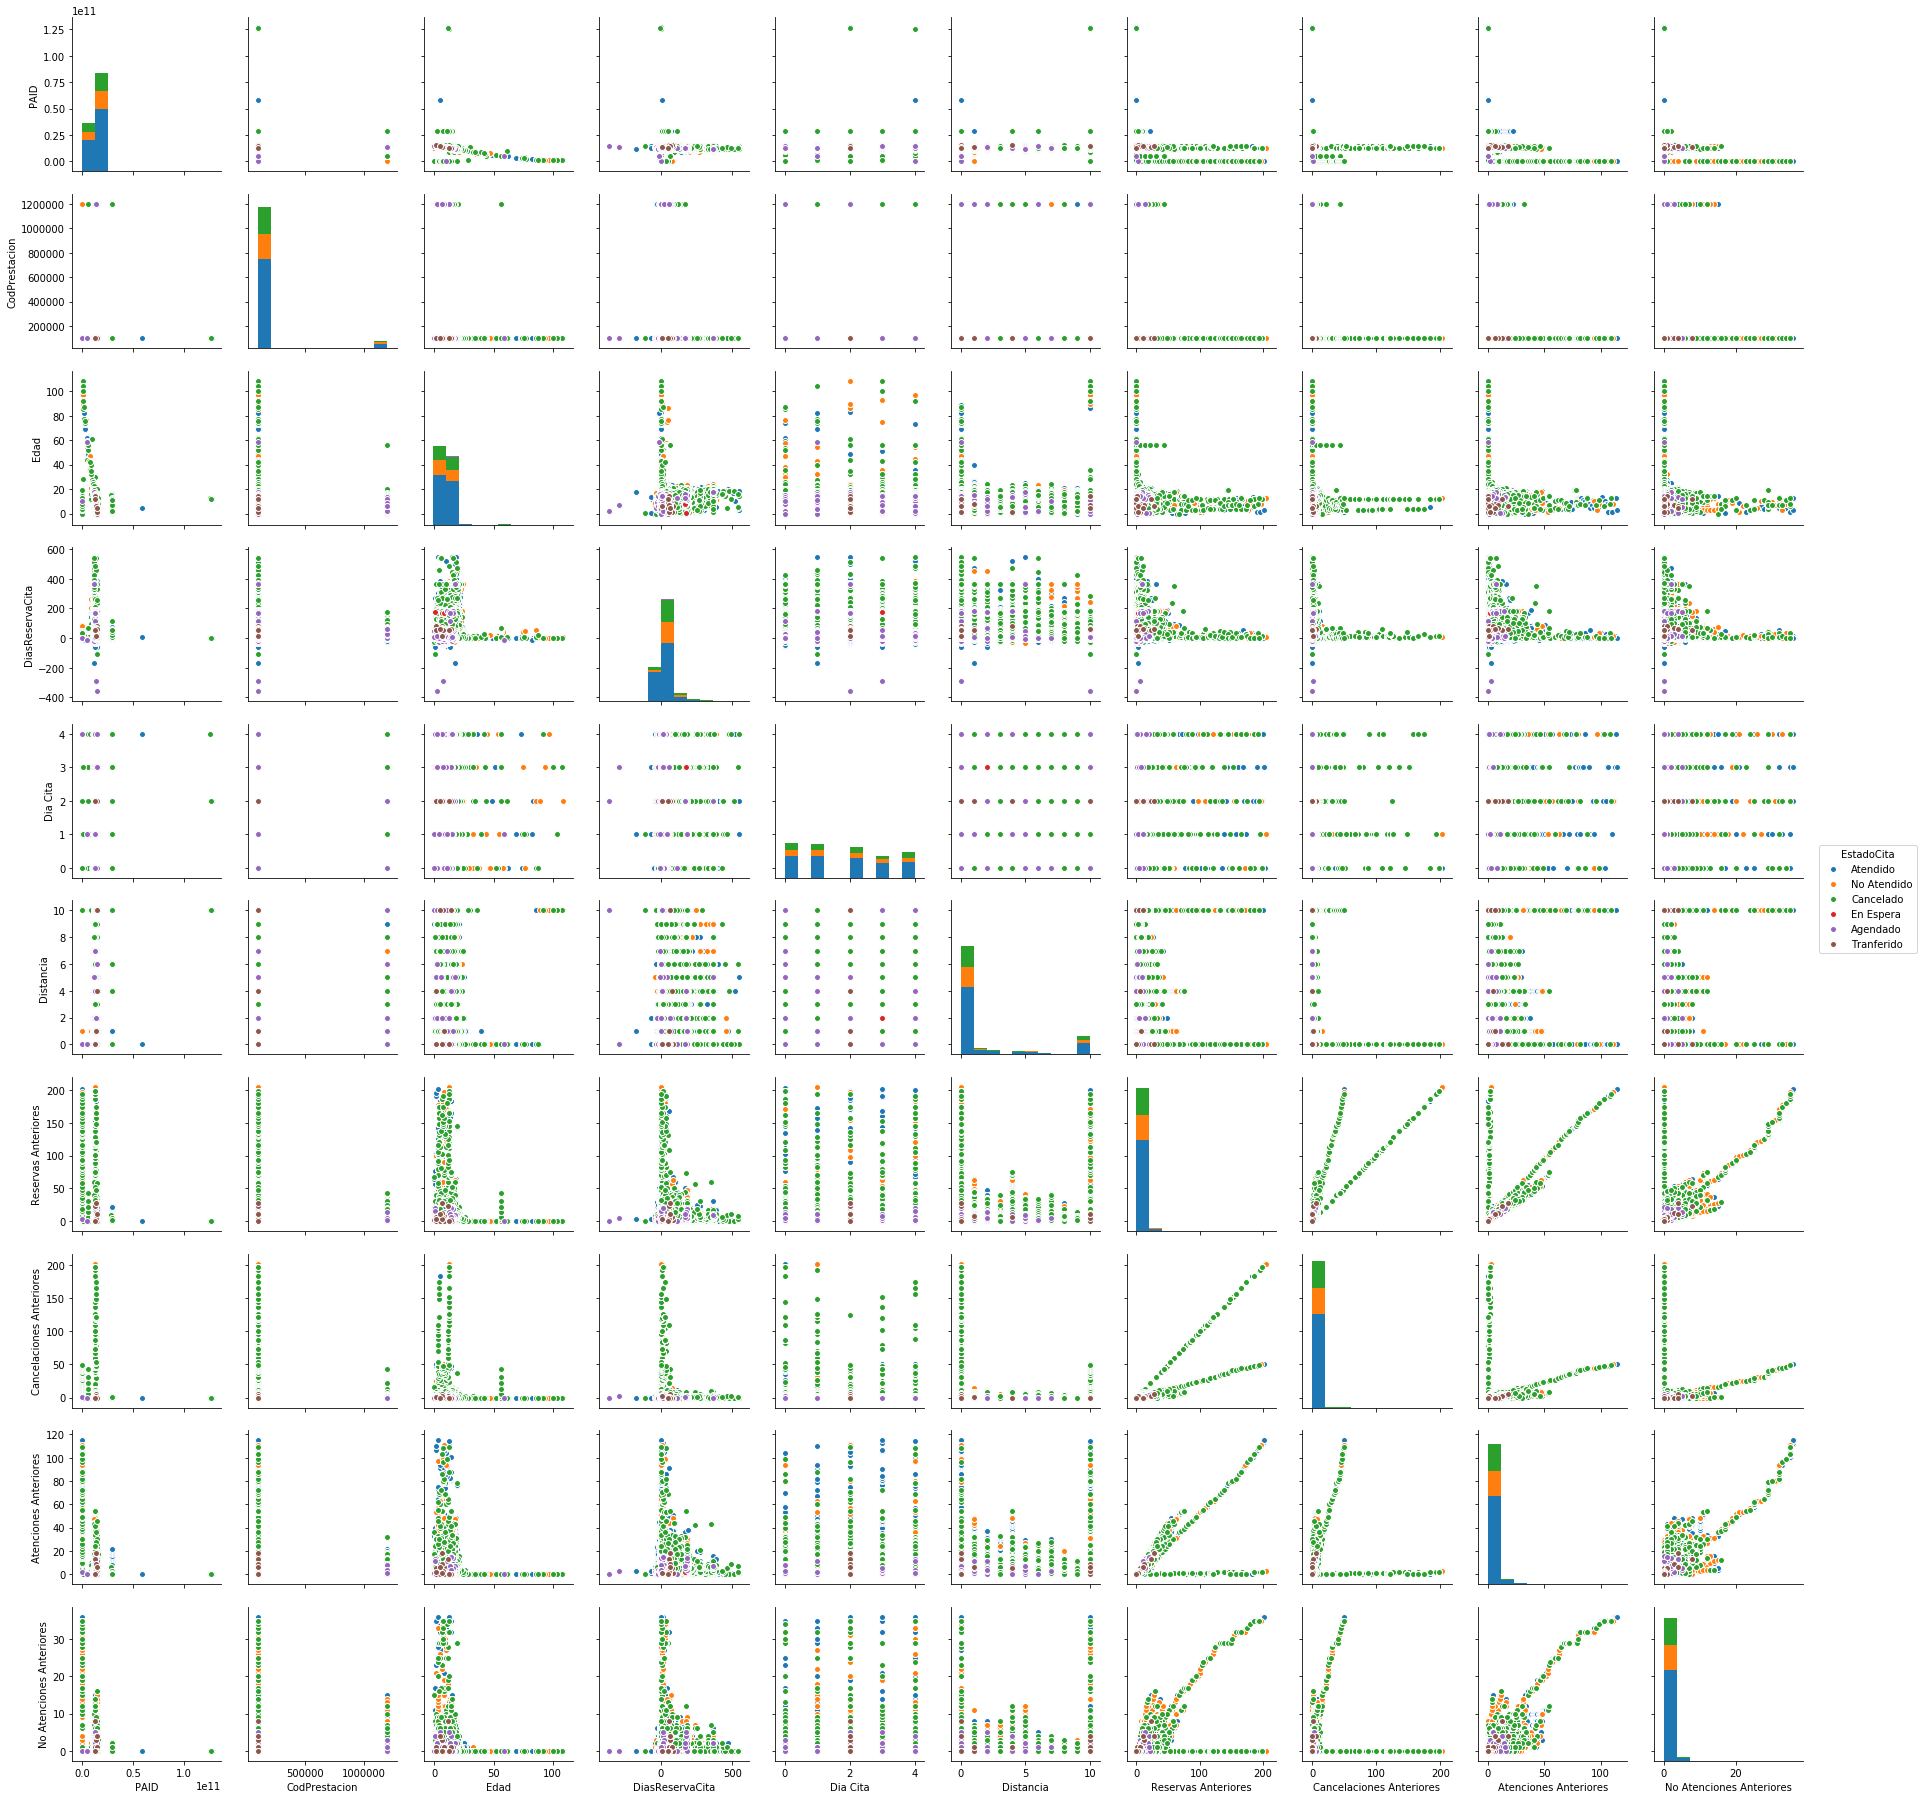

In [157]:
sns.pairplot(datos, hue="EstadoCita")

In [164]:
import keras

ModuleNotFoundError: No module named 'keras'